# Category Analysis



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [9]:
# Load Data
data = pd.read_csv("fake_transactional_data_24_v2.csv")

# Load Categories
cats = pd.read_csv("Purchase Type Grouping - Subcategories.csv")

In [10]:
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4.00,cinema,2025-01-01
1,88339,2.40,40544,2025-01-01
2,18555,2.40,85149,2025-01-01
3,18555,4.10,hipster coffee shop,2025-01-01
4,80792,1.95,18555,2025-01-01
...,...,...,...,...
10148275,32185,2.65,coffee shop,2025-12-31
10148276,32185,2.45,coffee shop,2025-12-31
10148277,57569,14.00,wine bar,2025-12-31
10148278,1490,9.00,57569,2025-12-31


In [11]:
data.columns

Index(['from_totally_fake_account', 'monopoly_money_amount',
       'to_randomly_generated_account', 'not_happened_yet_date'],
      dtype='object')

In total, excluding current account to current account transactions, we get 78 businesses.
These can be divided into categories and further into subcategories.
Subcategories are still TBC, but these should help us:
- Cafe
- General Retail
- Fashion & Apperal
- Bar & Drinks
- Book & Media
- Grocery
- Childrens Shop & Toys
- Food & Beverages
- Leisure
- Home Shop & Home Improvements
- Electronics & Technology
- Gifts & Souvenirs
- Health & Fitness
- Pet Food & Supplies
- Stationary & Office Supplies
- Subscriptions


In [12]:
cats

,purchase_type,purchase_category,purchase_subcategory
0,a cafe,Coffee/Cafe,Cafe
1,a local coffee shop,Coffee/Cafe,Cafe
2,a supermarket,Grocery,General Retail
3,accessory shop,Misc,Fashion & Apperal
4,bar,Bar/Pub,Bar & Drinks
...,...,...,...
74,we have bean weighting,Coffee/Cafe,Cafe
75,whiskey bar,Bar/Pub,Bar & Drinks
76,whiskey shop,Bar/Pub,Food & Beverages
77,wine bar,Bar/Pub,Bar & Drinks


# On average what is the size of each transaction going into each business?

Some businesses show a high number of transactions with low average spend, and vice-versa. From here we can subdivide them further

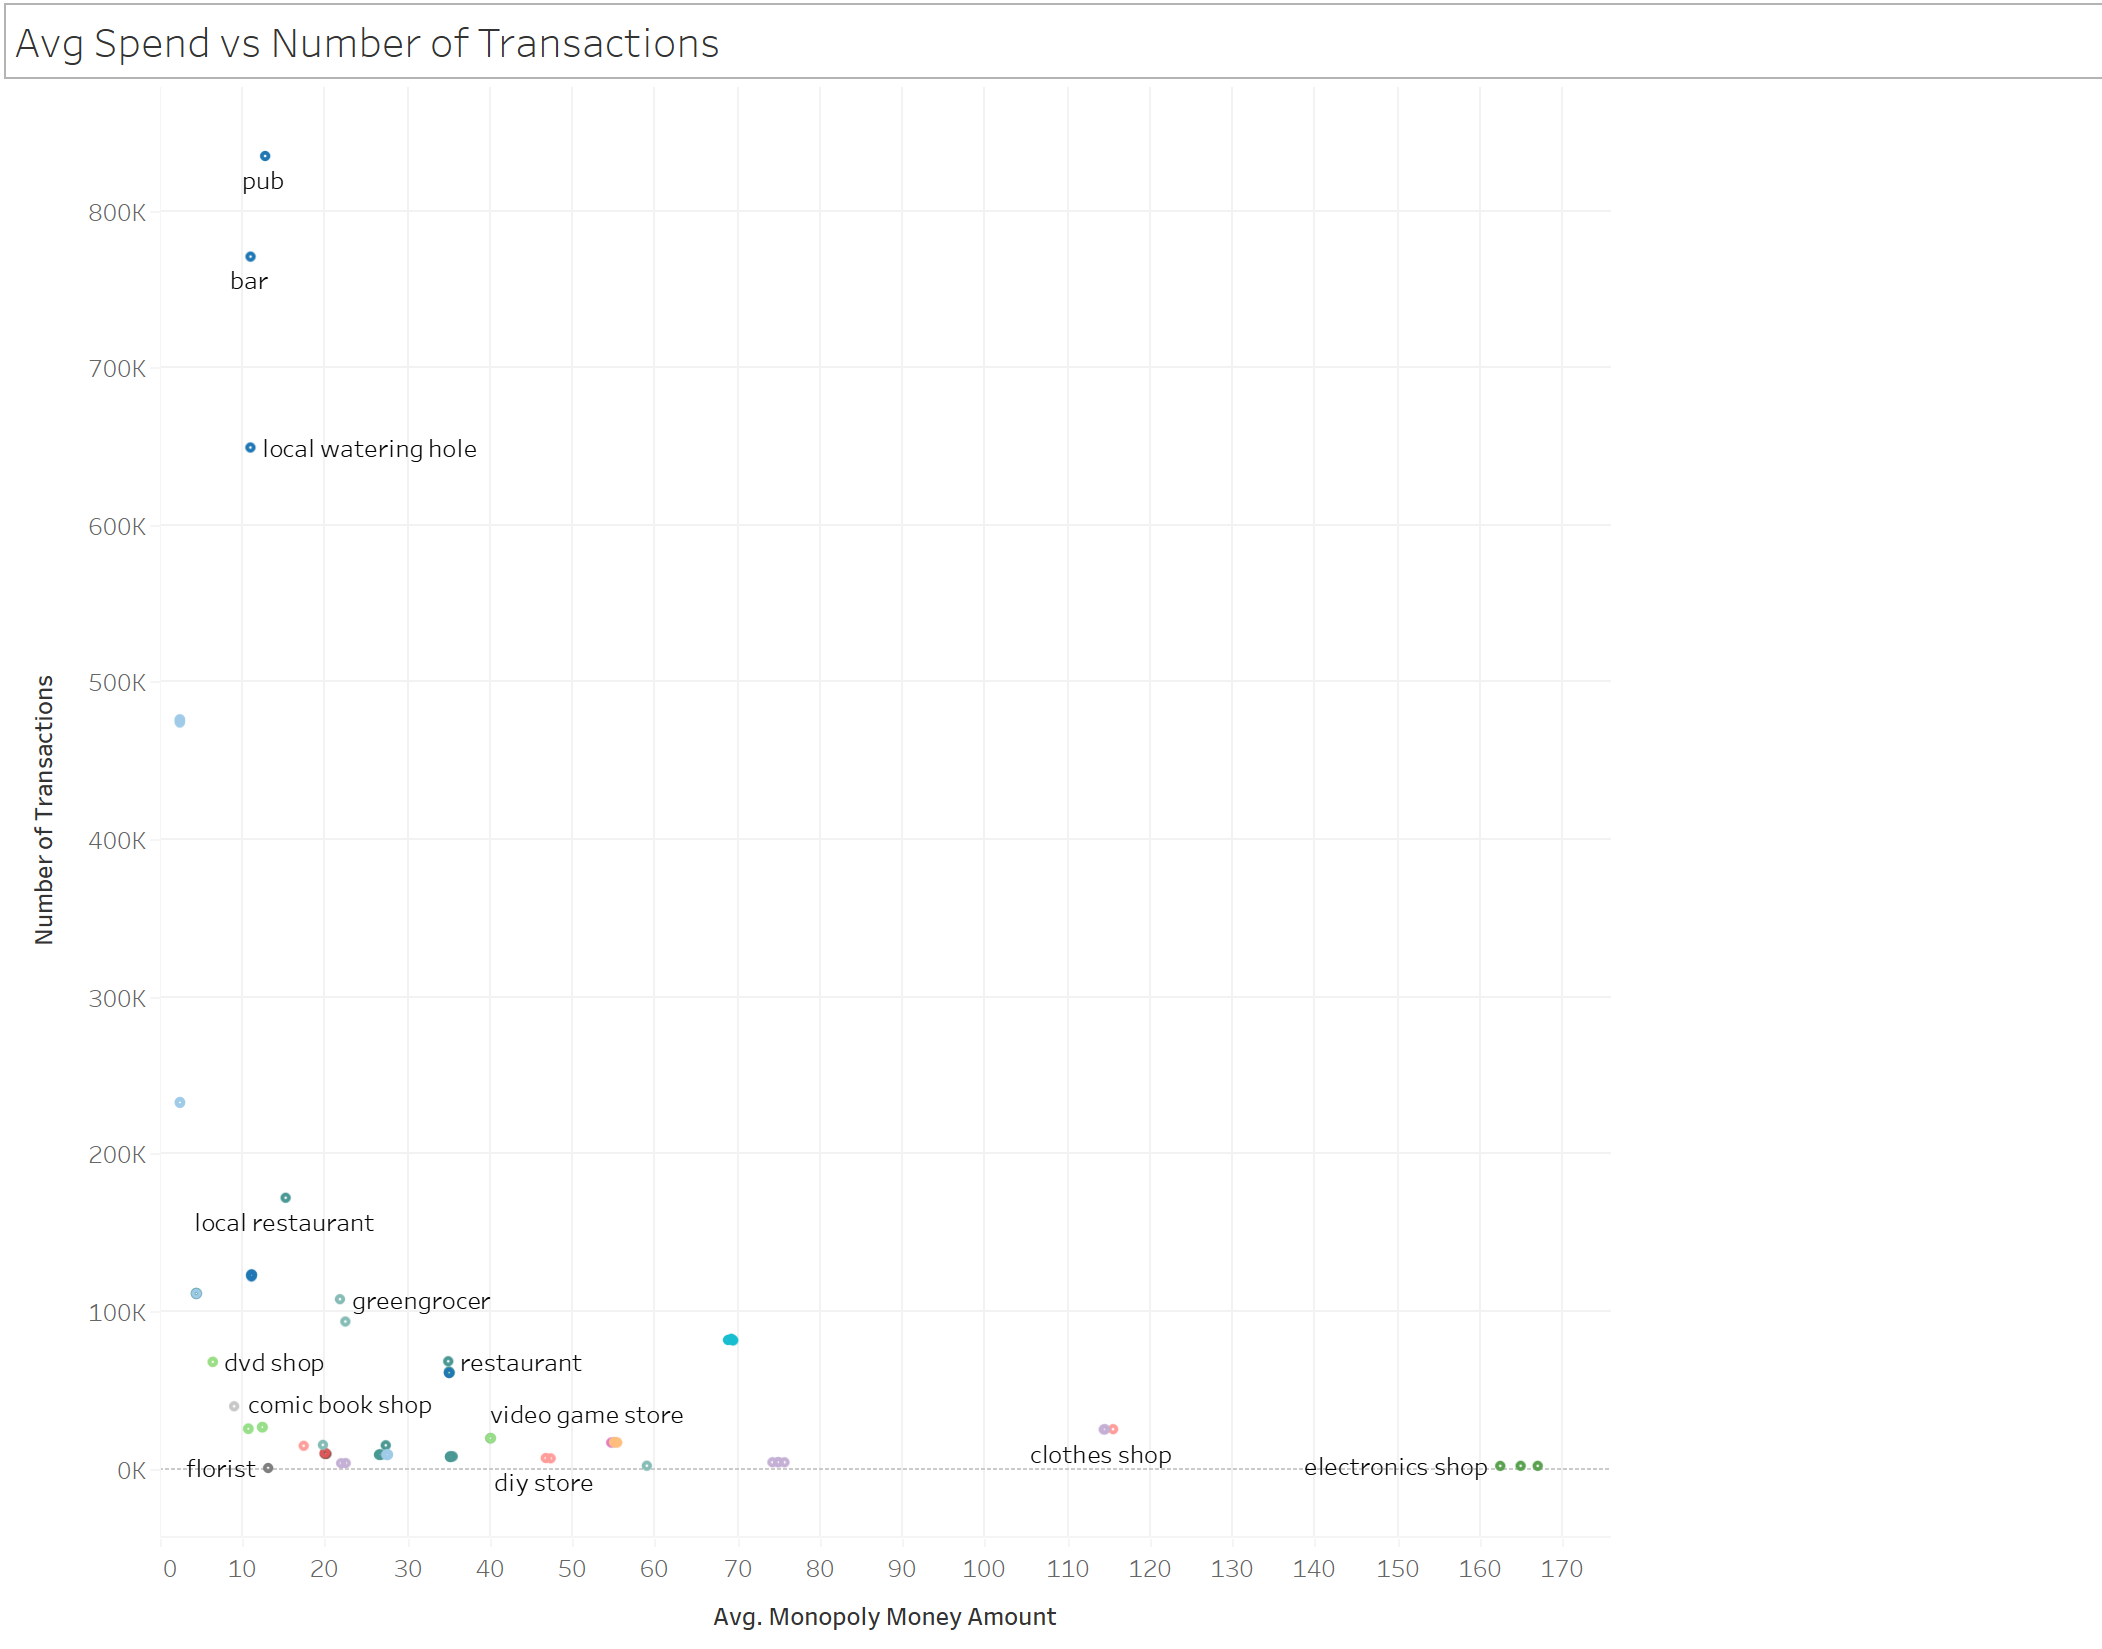

In [13]:
cats.dtypes

purchase_type           object
purchase_category       object
purchase_subcategory    object
dtype: object

In [7]:
# We group the dataset by business, and sum the total spent
income_per_account = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().reset_index()

In [8]:
# And get the total each account receives
income_per_account

,to_randomly_generated_account,monopoly_money_amount
0,1000,9021.60
1,10000,1208.00
2,100000,1367.45
3,100002,1045.40
4,100019,14199.95
...,...,...
14295,we have bean weighting,237398.69
14296,whiskey bar,1363735.00
14297,whiskey shop,234605.43
14298,wine bar,1353191.50


In [18]:
# Here we add the categories data table to the dataset
data_merged = pd.merge(data, cats, how='left', left_on='to_randomly_generated_account', right_on='purchase_type')
data_merged.fillna('transfer', inplace=True)

In [19]:
data_merged

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,purchase_type,purchase_category,purchase_subcategory
0,10371,4.00,cinema,2025-01-01,cinema,Eating Out/Leis,Leisure
1,88339,2.40,40544,2025-01-01,transfer,transfer,transfer
2,18555,2.40,85149,2025-01-01,transfer,transfer,transfer
3,18555,4.10,hipster coffee shop,2025-01-01,hipster coffee shop,Coffee/Cafe,Cafe
4,80792,1.95,18555,2025-01-01,transfer,transfer,transfer
...,...,...,...,...,...,...,...
10148275,32185,2.65,coffee shop,2025-12-31,coffee shop,Coffee/Cafe,Cafe
10148276,32185,2.45,coffee shop,2025-12-31,coffee shop,Coffee/Cafe,Cafe
10148277,57569,14.00,wine bar,2025-12-31,wine bar,Bar/Pub,Bar & Drinks
10148278,1490,9.00,57569,2025-12-31,transfer,transfer,transfer


In [35]:
# These are the unique categories which should match the category table.
unique_categories = data_merged['purchase_subcategory'].unique()
unique_categories

array(['Leisure', 'transfer', 'Cafe', 'Food & Beverages', 'Bar & Drinks',
       'Childrens Shop & Toys', 'Book & Media',
       'Home Shop & Home Improvements', 'Electronics & Technology',
       'Fashion & Apperal', 'Stationary & Office Supplies',
       'Pet Food & Supplies', 'Grocery', 'Subscriptions',
       'Health & Fitness', 'General Retail', 'Gifts & Souvenirs'],
      dtype=object)

We can now plot a normal distribution graph to check for skewness - do some places have an higher proportion ofthe population spending on the higher end, or is it evenly distribution? Should tell us something about the types of customers each business is targeting.

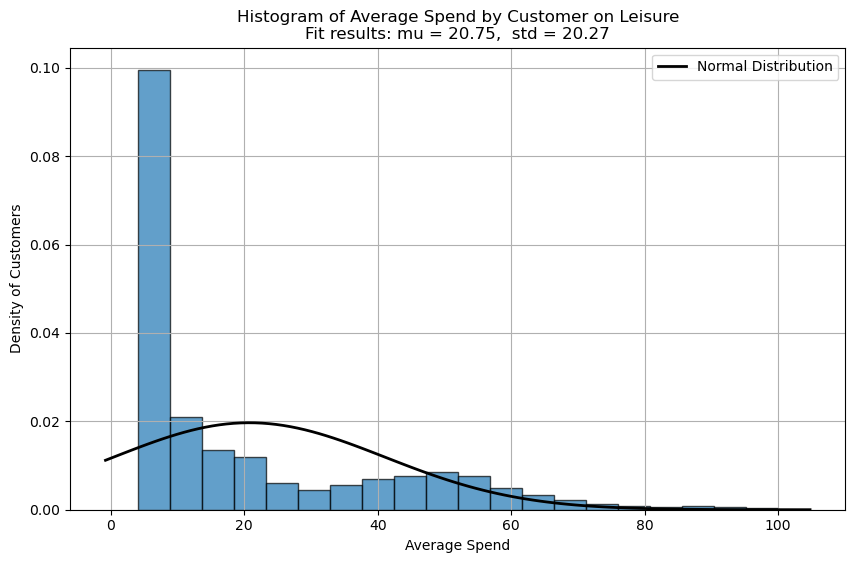

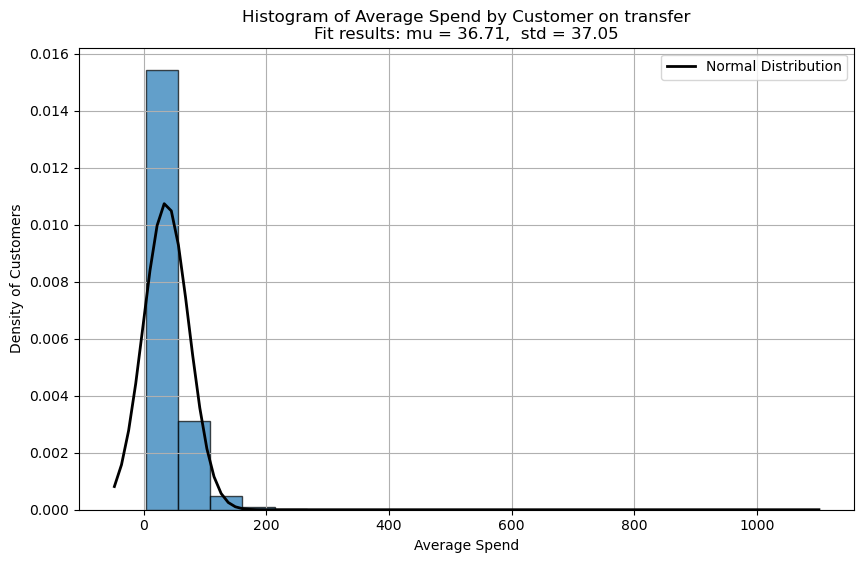

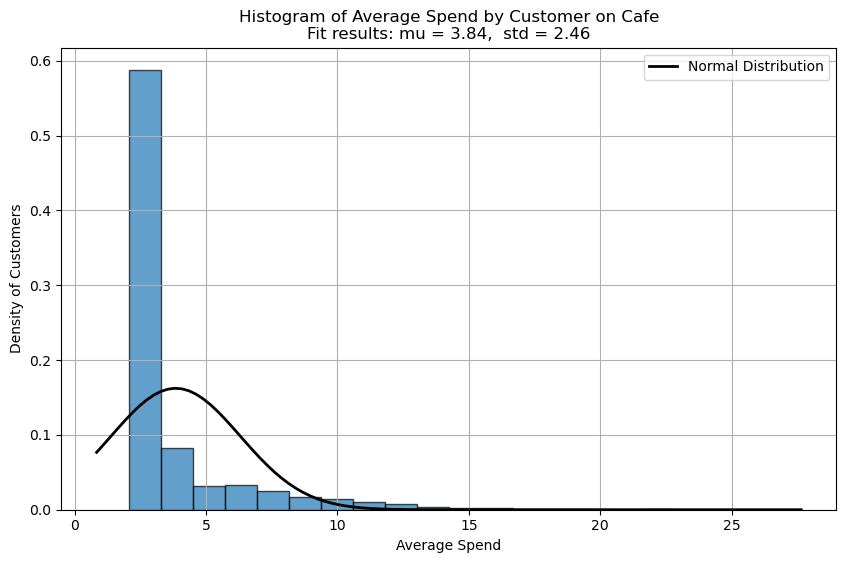

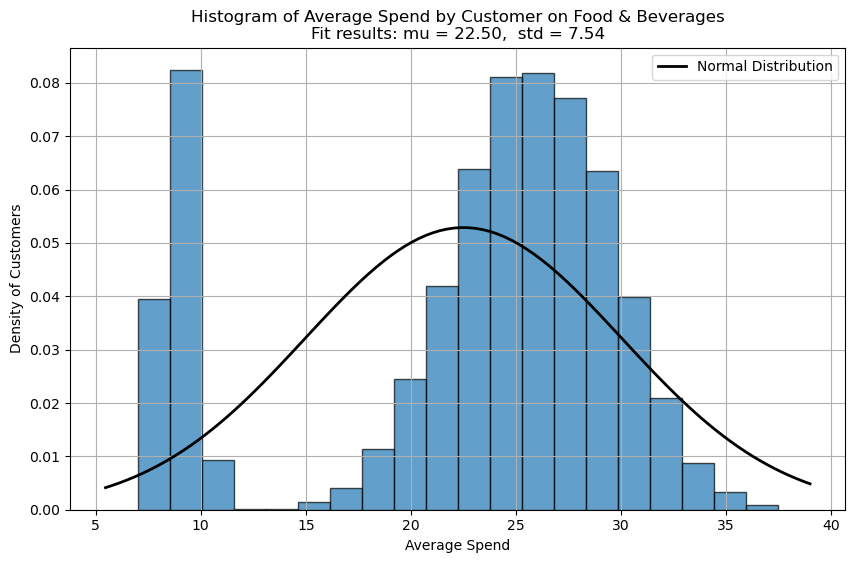

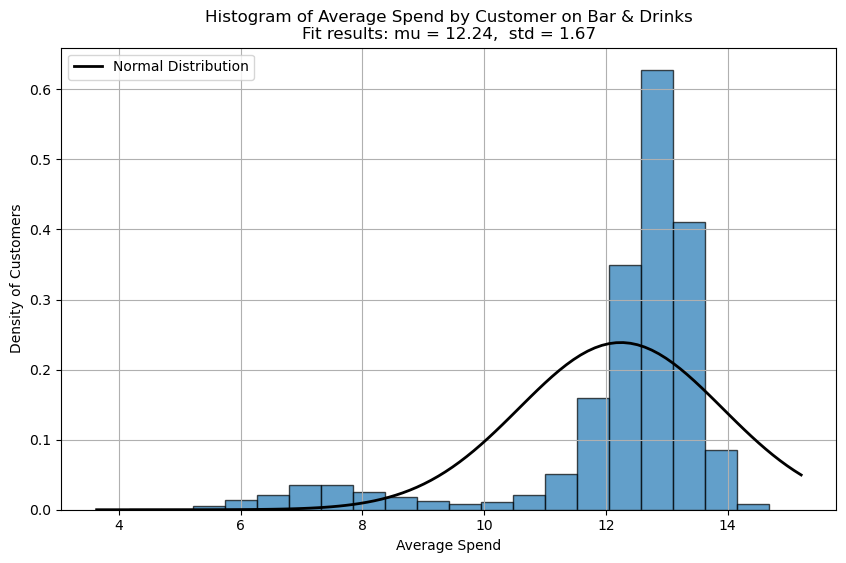

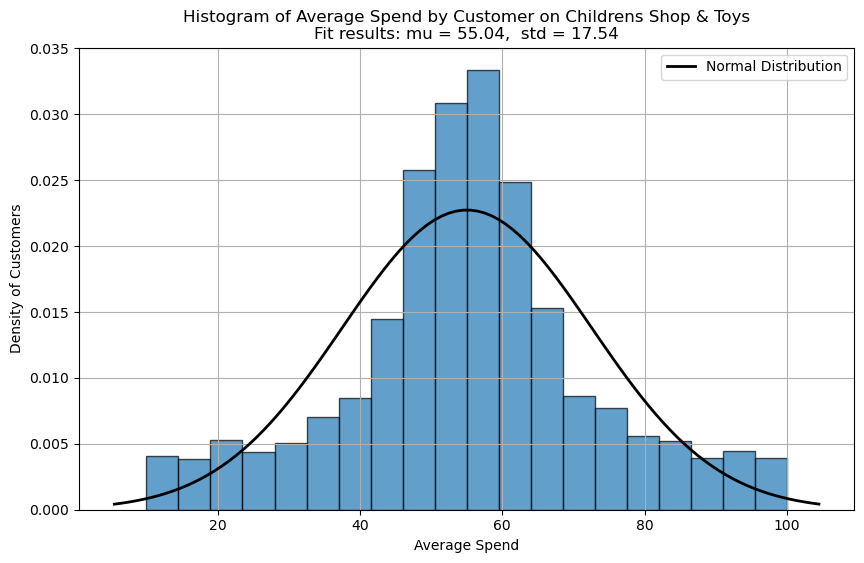

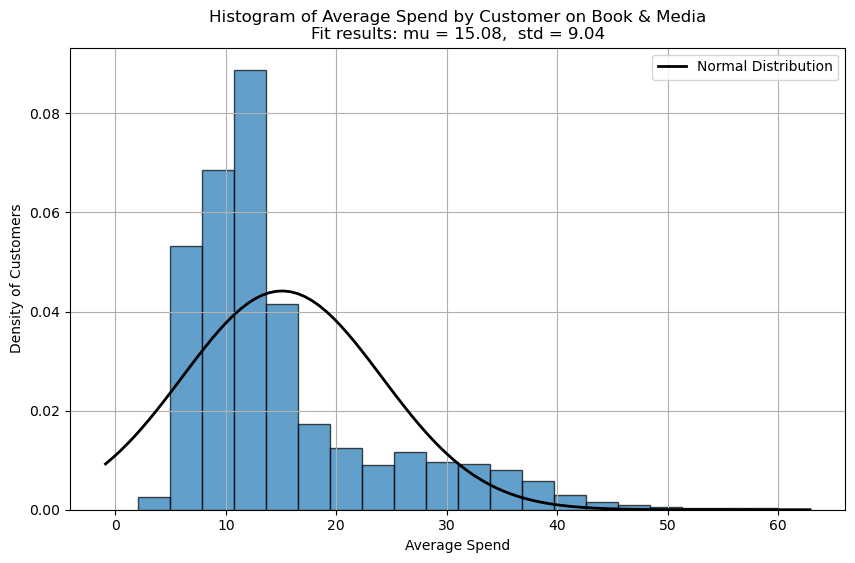

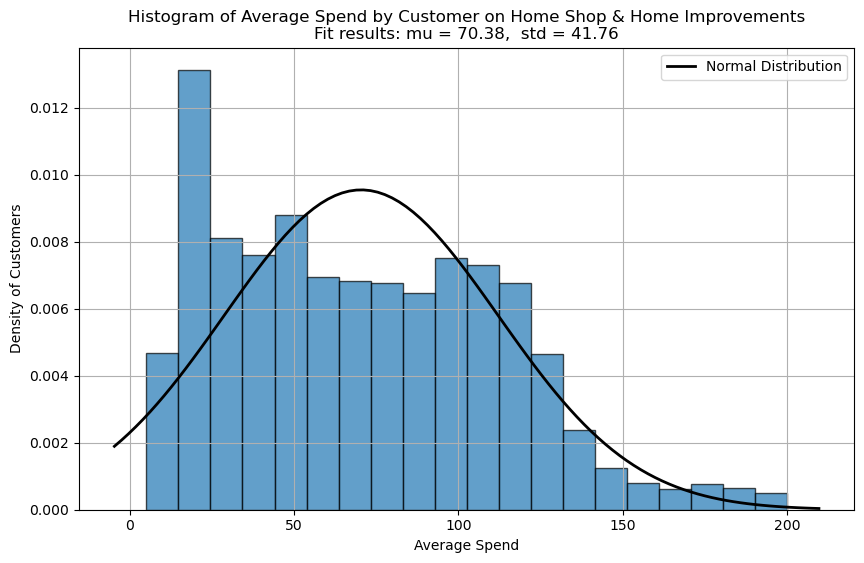

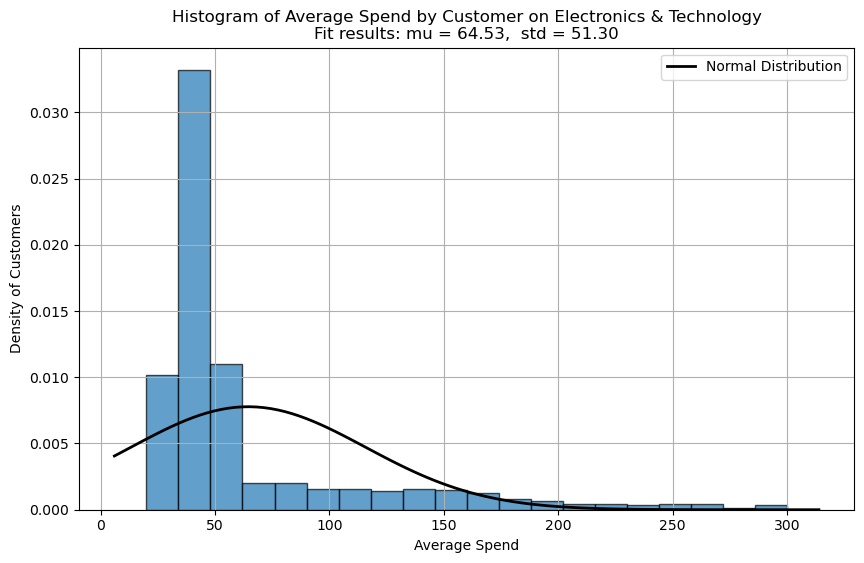

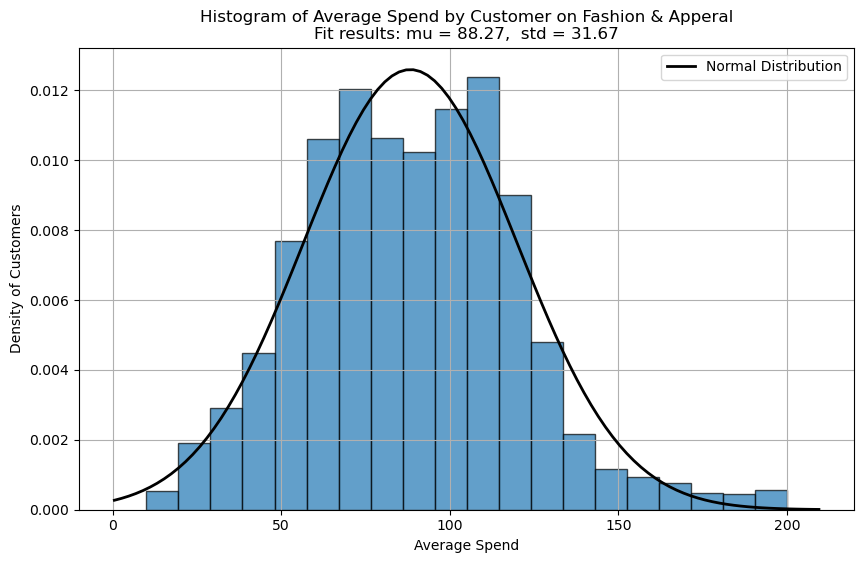

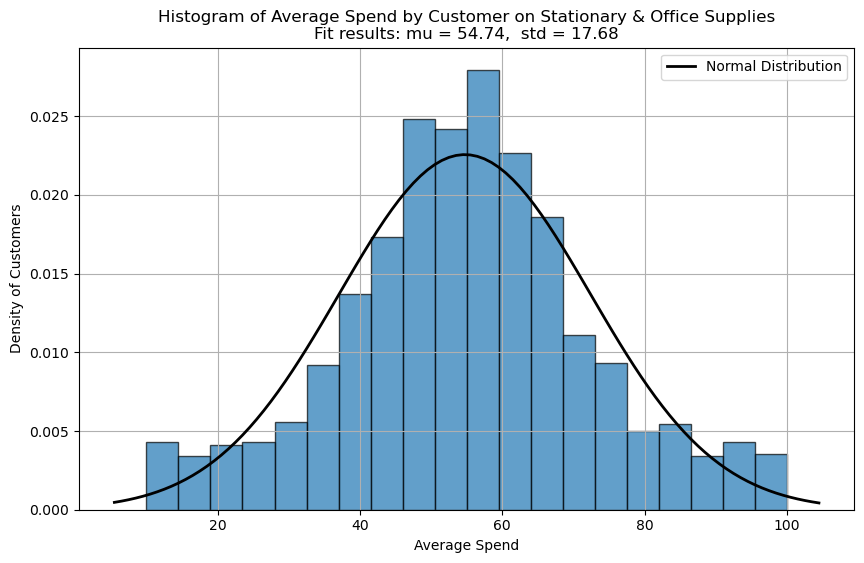

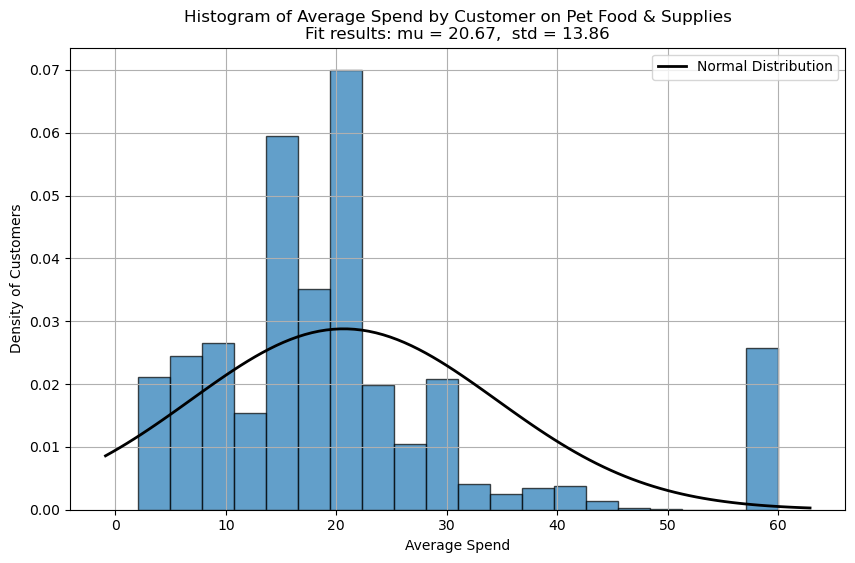

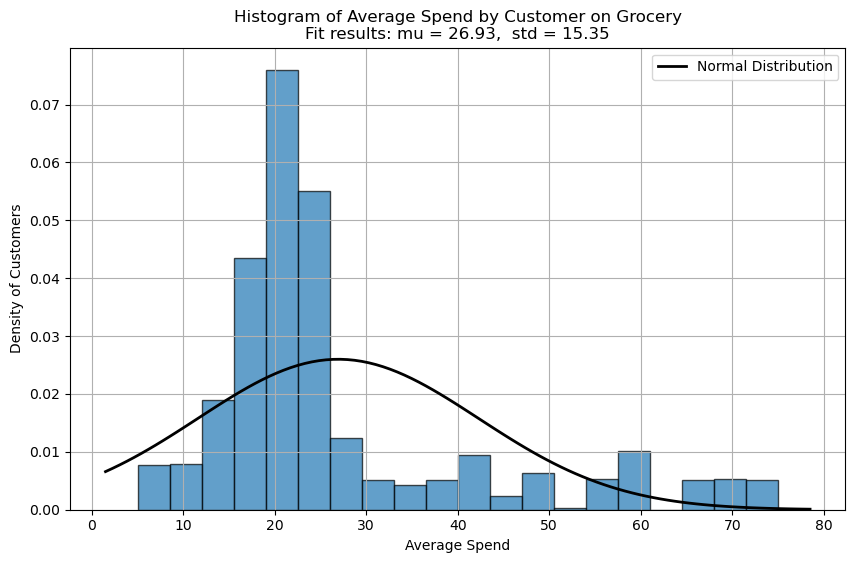

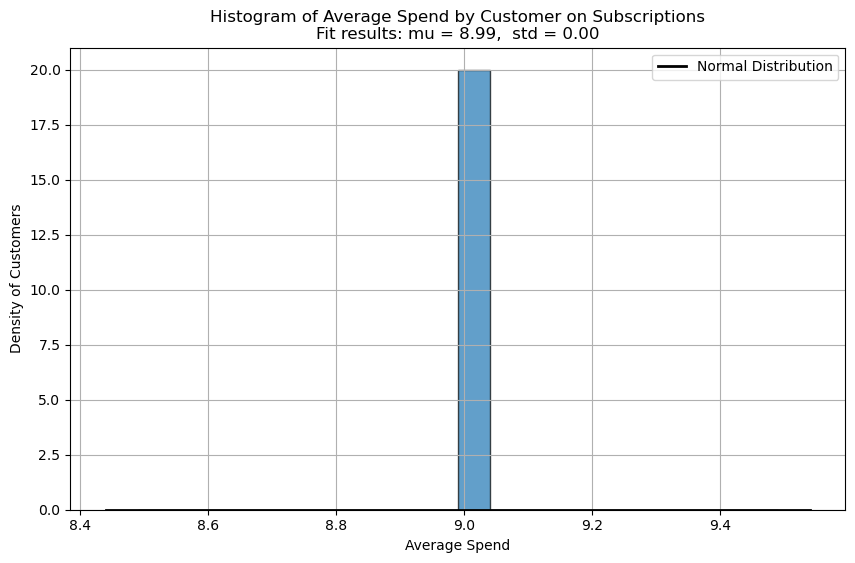

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


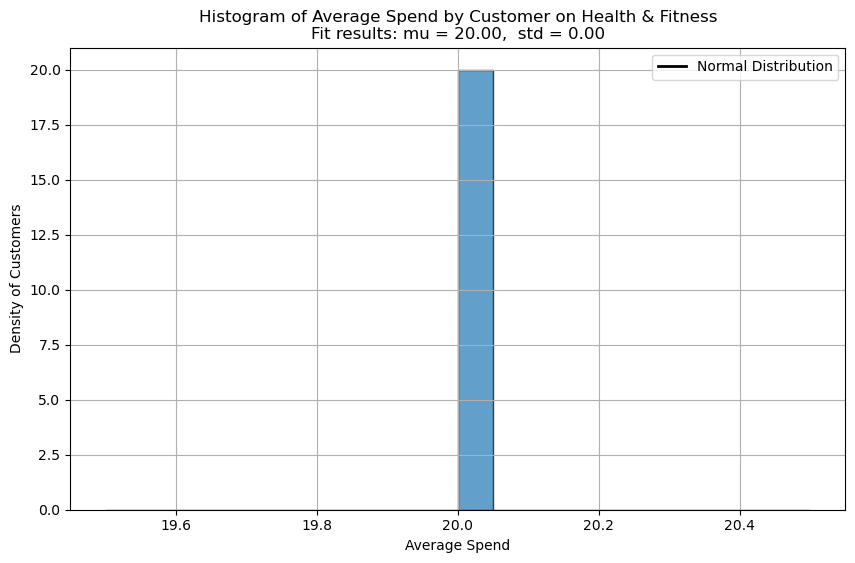

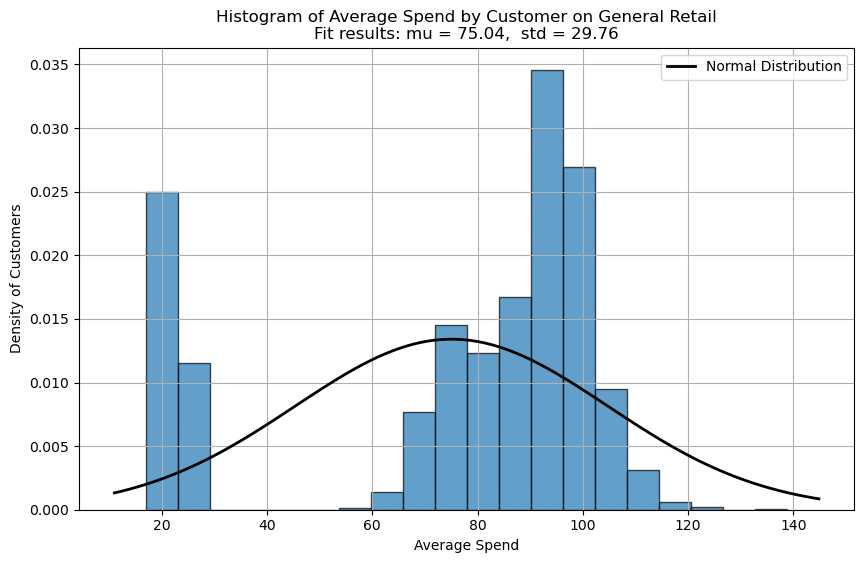

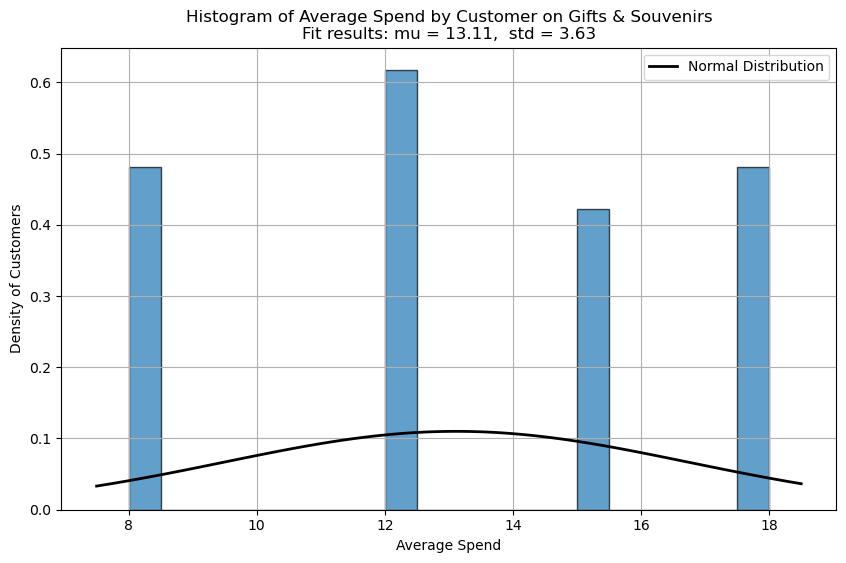

In [38]:
for category in unique_categories:
    
    category_df = data_merged[data_merged['purchase_subcategory'] == category]
    
    average_spend = category_df.groupby('from_totally_fake_account')['monopoly_money_amount'].mean()
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    count, bins, ignored = plt.hist(average_spend, bins=20, edgecolor='k', alpha=0.7, density=True)
    
    mu, std = norm.fit(average_spend)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
    title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
    plt.title(f'Histogram of Average Spend by Customer on {category}\n{title}')
    plt.xlabel('Average Spend')
    plt.ylabel('Density of Customers')
    plt.grid(True)
    plt.legend()
    plt.show()

Next steps from here is to divide each business into premium/generalist/budget categories.
From this we can then divide the customers by where they choose to spend more often and be able to categorise them.

Big problem we have: I believe income is not explicit in the data, so it will have to be infered by this.

The majority of the accounts show income less than 10k, which does not seem realistic.
On top of this the payments to each account are not regular. The majority should be at the end of the month or weekly.

# Seasonality
The average transactions across the year shows a strange behaviour in Feb:
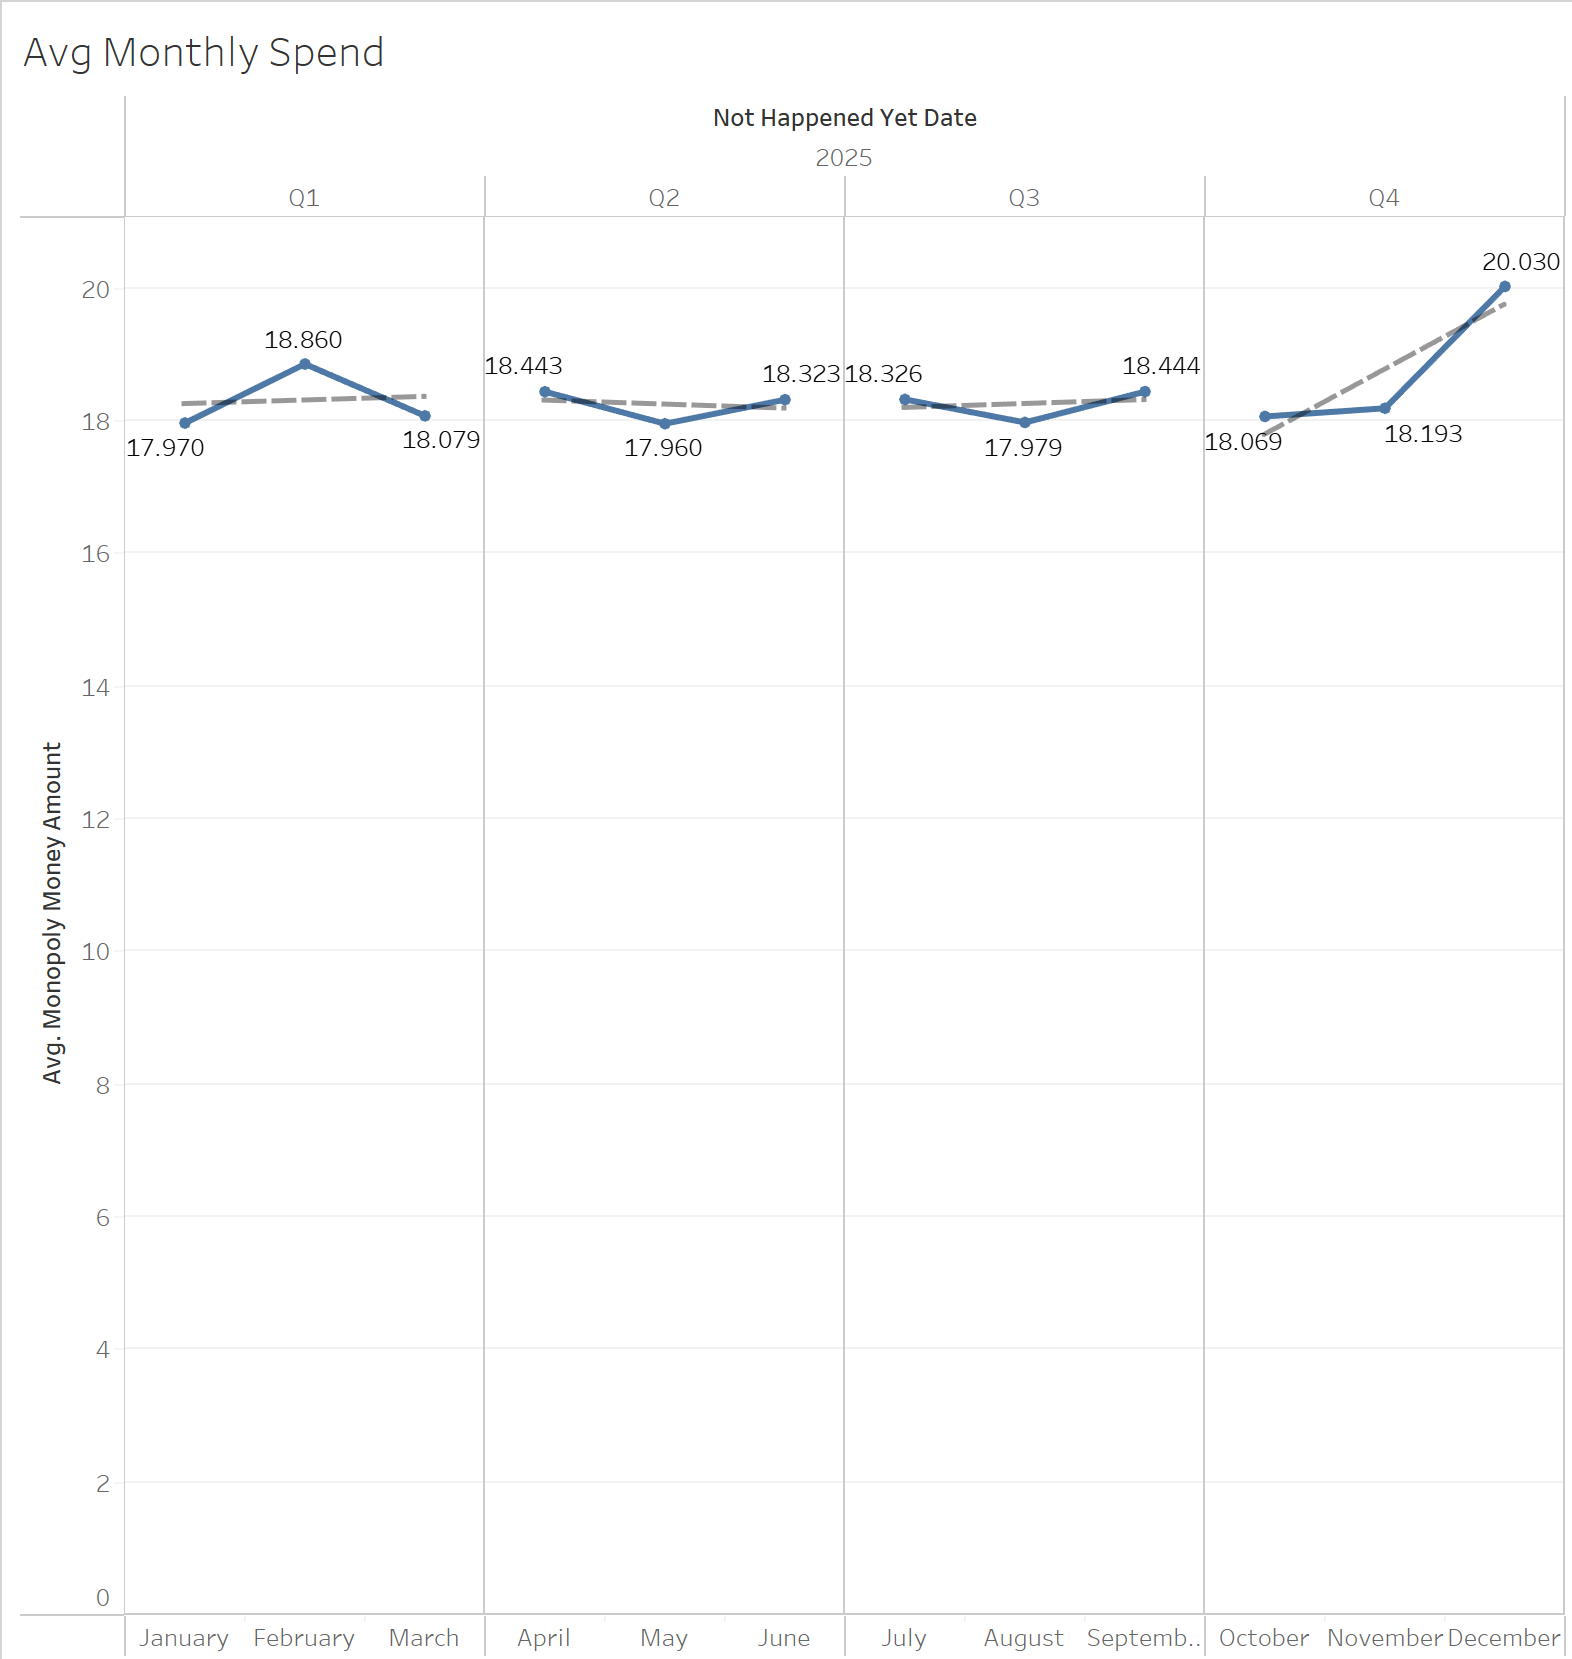

However it starts looking more ok once we remove transfers between personal accounts:
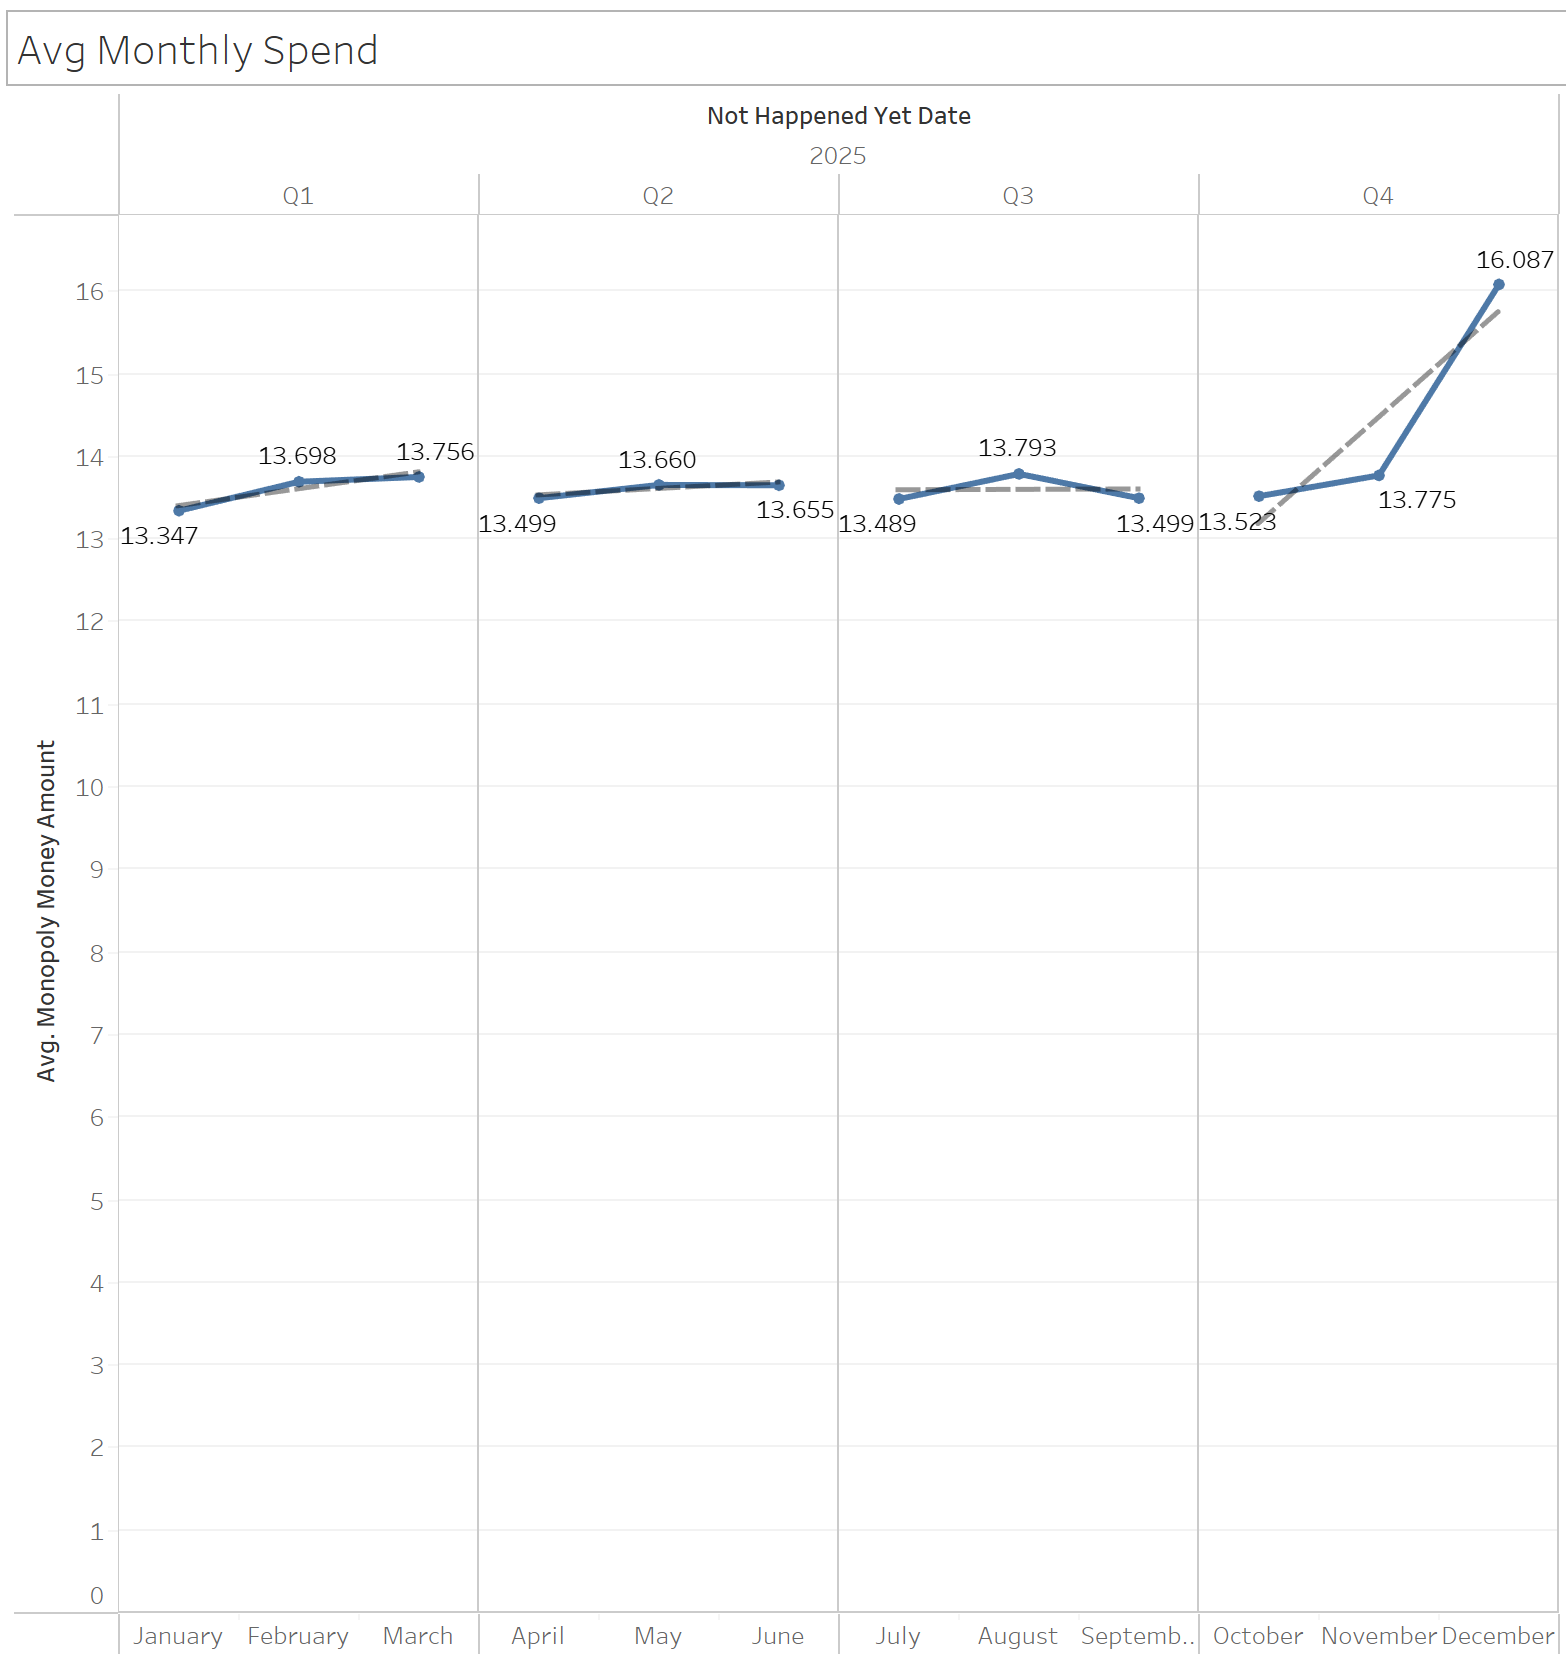

This makes more sense, much smaller variation across the months, but a sudden peak in Christmas time, as expected

We can even look into each category further:
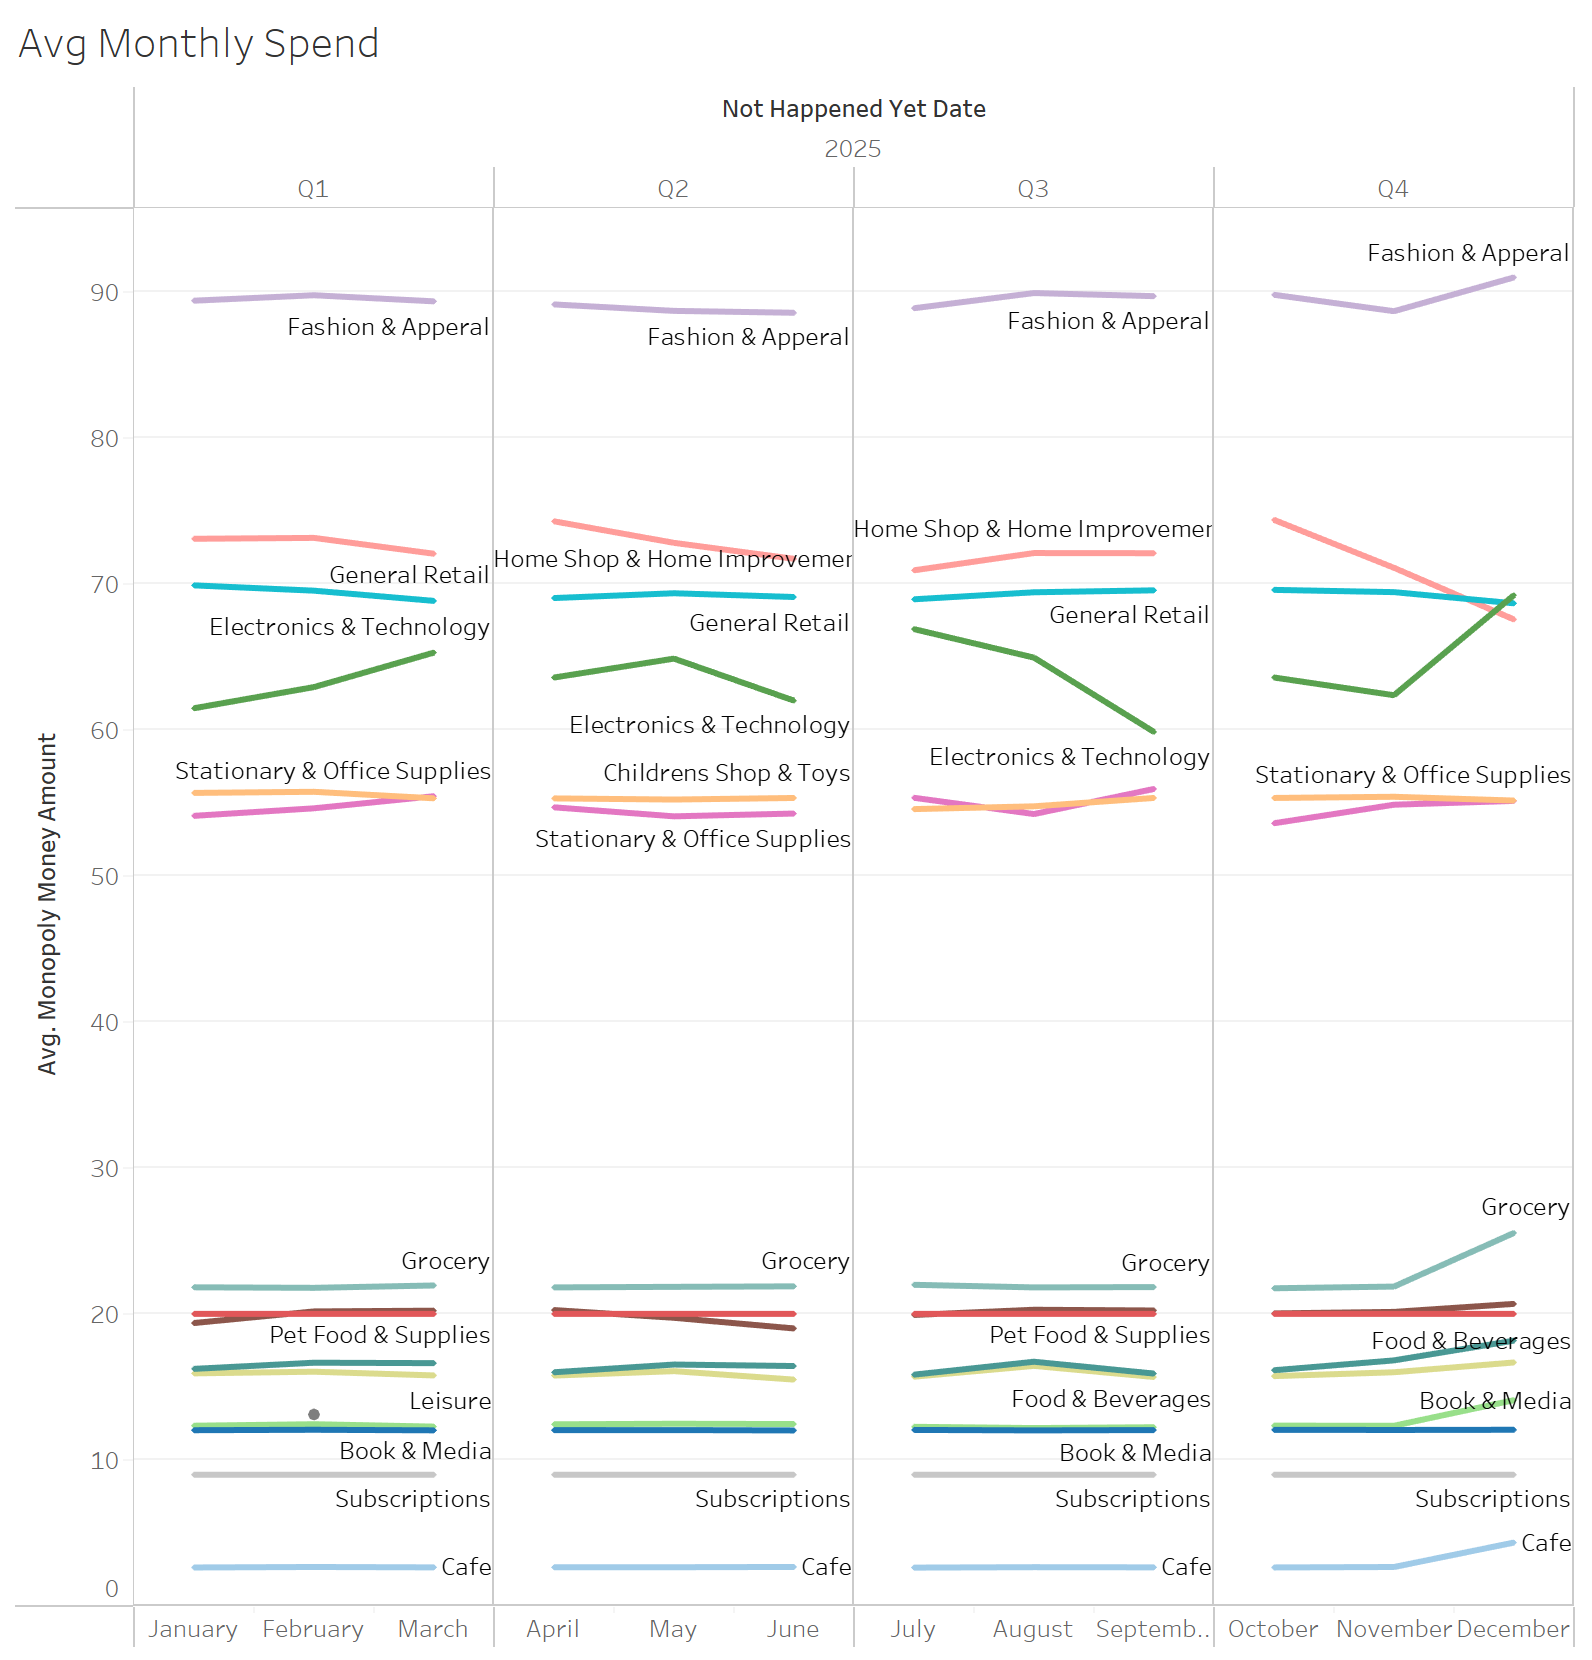

There is still a strange spike in February and June on the technology segment, this is something that can also be investigated further. Could be end of year bonuses, could also be that is not holiday season and people are not traveling...